# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from key import api

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # Replace spaces with %20 so that url doesn't fail
    city = city.replace(" ", "%20")
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:

        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


597

In [10]:
# Create a dictonary with the lists generated
cities_dict = {"Cities": cities}

# convert dictionary to dataframe
cities_df = pd.DataFrame(cities_dict)

# Display count of weather data values 
cities_df.count()

Cities    597
dtype: int64

In [11]:
# Save to CSV
cities_df.to_csv('CitiesCSV/cities_data.csv')

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:
# Base URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api
url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b7263850ebb29601848b1aa2acbd735'

In [13]:
# Create empty list for weather data
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Counter for Loop
record = 1

# Note that data is being retrieved
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the city list
for city in cities:  
    
    # Try/except statement so that loop proceeds if nothing found
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Pause to avoid API limit
        time.sleep(2)
        
    # If no record found print statement to notifying we are skipping
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b7263850ebb29601848b1aa2acbd735&q=mataura
City not found. Skipping...
Processing Record 2 | Sao Joao da Barra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b7263850ebb29601848b1aa2acbd735&q=sao%20joao%20da%20barra
Processing Record 3 | Hit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b7263850ebb29601848b1aa2acbd735&q=hit
Processing Record 4 | Portland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b7263850ebb29601848b1aa2acbd735&q=portland
Processing Record 5 | Noumea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b7263850ebb29601848b1aa2acbd735&q=noumea
Processing Record 6 | Mahebourg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b7263850ebb29601848b1aa2acbd735&q=mahebourg
Processing Record 7 | Mount Gambier
http://api.

Processing Record 56 | Garlasco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b7263850ebb29601848b1aa2acbd735&q=garlasco
Processing Record 57 | Talnakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b7263850ebb29601848b1aa2acbd735&q=talnakh
Processing Record 58 | Shirokiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b7263850ebb29601848b1aa2acbd735&q=shirokiy
Processing Record 59 | Toropets
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b7263850ebb29601848b1aa2acbd735&q=toropets
Processing Record 60 | Busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b7263850ebb29601848b1aa2acbd735&q=busselton
Processing Record 61 | Cap Malheureux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b7263850ebb29601848b1aa2acbd735&q=cap%20malheureux
Processing Record 62 | Upernavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b7263850ebb29601848b

Processing Record 112 | Dingle
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b7263850ebb29601848b1aa2acbd735&q=dingle
Processing Record 113 | Qaqortoq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b7263850ebb29601848b1aa2acbd735&q=qaqortoq
Processing Record 114 | Atar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b7263850ebb29601848b1aa2acbd735&q=atar
Processing Record 115 | Mount Isa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b7263850ebb29601848b1aa2acbd735&q=mount%20isa
Processing Record 116 | Chuy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b7263850ebb29601848b1aa2acbd735&q=chuy
Processing Record 117 | Glasgow
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b7263850ebb29601848b1aa2acbd735&q=glasgow
Processing Record 118 | Tautira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b7263850ebb29601848b1aa2acbd735&q=tautira
Proce

Processing Record 168 | Suslovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b7263850ebb29601848b1aa2acbd735&q=suslovo
Processing Record 169 | Vao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b7263850ebb29601848b1aa2acbd735&q=vao
Processing Record 170 | San Policarpo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b7263850ebb29601848b1aa2acbd735&q=san%20policarpo
Processing Record 171 | Todos Santos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b7263850ebb29601848b1aa2acbd735&q=todos%20santos
Processing Record 172 | Vila Velha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b7263850ebb29601848b1aa2acbd735&q=vila%20velha
Processing Record 173 | Savinka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b7263850ebb29601848b1aa2acbd735&q=savinka
Processing Record 174 | San Cristobal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b7263850e

Processing Record 223 | Maniitsoq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b7263850ebb29601848b1aa2acbd735&q=maniitsoq
Processing Record 224 | Kugulta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b7263850ebb29601848b1aa2acbd735&q=kugulta
Processing Record 225 | Willowmore
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b7263850ebb29601848b1aa2acbd735&q=willowmore
Processing Record 226 | Kodiak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b7263850ebb29601848b1aa2acbd735&q=kodiak
Processing Record 227 | Nantucket
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b7263850ebb29601848b1aa2acbd735&q=nantucket
Processing Record 228 | Norton Shores
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b7263850ebb29601848b1aa2acbd735&q=norton%20shores
Processing Record 229 | Norrtalje
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b7263850ebb29

Processing Record 278 | Salmas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b7263850ebb29601848b1aa2acbd735&q=salmas
Processing Record 279 | Corovode
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b7263850ebb29601848b1aa2acbd735&q=corovode
Processing Record 280 | Havelock
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b7263850ebb29601848b1aa2acbd735&q=havelock
Processing Record 281 | Constitucion
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b7263850ebb29601848b1aa2acbd735&q=constitucion
City not found. Skipping...
Processing Record 282 | Evensk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b7263850ebb29601848b1aa2acbd735&q=evensk
Processing Record 283 | Papagaios
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b7263850ebb29601848b1aa2acbd735&q=papagaios
Processing Record 284 | Severo-Kurilsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial

Processing Record 333 | Khuzhir
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b7263850ebb29601848b1aa2acbd735&q=khuzhir
Processing Record 334 | Istok
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b7263850ebb29601848b1aa2acbd735&q=istok
Processing Record 335 | Belozerskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b7263850ebb29601848b1aa2acbd735&q=belozerskoye
Processing Record 336 | Flin Flon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b7263850ebb29601848b1aa2acbd735&q=flin%20flon
Processing Record 337 | Jalu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b7263850ebb29601848b1aa2acbd735&q=jalu
Processing Record 338 | Marawi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b7263850ebb29601848b1aa2acbd735&q=marawi
Processing Record 339 | Kununurra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b7263850ebb29601848b1aa2acbd735&q=k

Processing Record 389 | Kathu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b7263850ebb29601848b1aa2acbd735&q=kathu
Processing Record 390 | Douglas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b7263850ebb29601848b1aa2acbd735&q=douglas
Processing Record 391 | Hualmay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b7263850ebb29601848b1aa2acbd735&q=hualmay
Processing Record 392 | Iquitos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b7263850ebb29601848b1aa2acbd735&q=iquitos
City not found. Skipping...
Processing Record 393 | ChengDe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b7263850ebb29601848b1aa2acbd735&q=chengde
Processing Record 394 | Sokoni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b7263850ebb29601848b1aa2acbd735&q=sokoni
Processing Record 395 | Sandakan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b7263850ebb2960184

Processing Record 444 | Bodden Town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b7263850ebb29601848b1aa2acbd735&q=bodden%20town
Processing Record 445 | Sioux Lookout
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b7263850ebb29601848b1aa2acbd735&q=sioux%20lookout
Processing Record 446 | Nuevo Progreso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b7263850ebb29601848b1aa2acbd735&q=nuevo%20progreso
City not found. Skipping...
Processing Record 447 | Isilkul
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b7263850ebb29601848b1aa2acbd735&q=isilkul
Processing Record 448 | Longyearbyen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b7263850ebb29601848b1aa2acbd735&q=longyearbyen
Processing Record 449 | Taga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b7263850ebb29601848b1aa2acbd735&q=taga
Processing Record 450 | Nador
http://api.openweathermap.org/data/2.5/w

Processing Record 500 | Letterkenny
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b7263850ebb29601848b1aa2acbd735&q=letterkenny
Processing Record 501 | Bhatkal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b7263850ebb29601848b1aa2acbd735&q=bhatkal
Processing Record 502 | Wattegama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b7263850ebb29601848b1aa2acbd735&q=wattegama
Processing Record 503 | Chara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b7263850ebb29601848b1aa2acbd735&q=chara
Processing Record 504 | Roald
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b7263850ebb29601848b1aa2acbd735&q=roald
City not found. Skipping...
Processing Record 505 | Baglung
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b7263850ebb29601848b1aa2acbd735&q=baglung
Processing Record 506 | Beringovskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b726

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
# create a dictonary using variables from previous step
weather_dict = {"City":city_name, "Cloudiness":cloudiness, "Country":country, "Date":date, "Humidity":humidity, "Lat":lat, "Lng":lng, "Max Temp":max_temp, "Wind Speed":wind_speed}

# convert dictionary to dataframe
weather_df = pd.DataFrame(weather_dict)

# check count of weather data values 
weather_df.count()

City          536
Cloudiness    536
Country       536
Date          536
Humidity      536
Lat           536
Lng           536
Max Temp      536
Wind Speed    536
dtype: int64

In [15]:
# Save dataframe as CSV
weather_df.to_csv('WeatherCSV/weather_data.csv')

# Display header
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Mataura,52,NZ,1562819251,83,-46.19,168.86,52.00,3.00
1,Sao Joao da Barra,0,BR,1562819253,90,-21.64,-41.05,58.22,1.39
2,Hit,0,IQ,1562819255,31,33.64,42.83,83.91,17.94
3,Portland,90,US,1562818983,77,43.66,-70.25,64.40,3.36
4,Noumea,0,NC,1562819089,64,-22.28,166.46,73.40,8.05


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

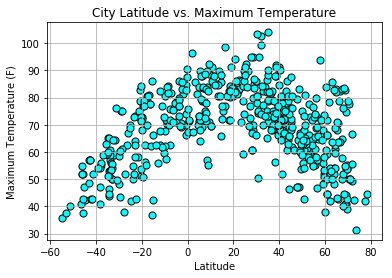

In [26]:
# build a scatter plot
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o", s=50, edgecolors="black", facecolors="aqua")

# create labels
plt.title("City Latitude vs. Maximum Temperature")
plt.ylabel("Maximum Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# save plot to folder
plt.savefig("WeatherPlots/MAXTEMPvsLATITUDE.png")

# show plot
plt.show()

#### Latitude vs. Humidity Plot

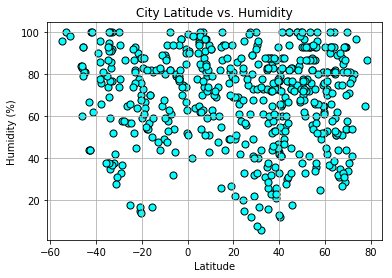

In [28]:
# build a scatter plot 
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o", s=50, edgecolors="black", facecolors="aqua")

# create labels
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# save plot to folder
plt.savefig("WeatherPlots/HUMIDITYvsLATITUDE.png")

# show plot
plt.show()

#### Latitude vs. Cloudiness Plot

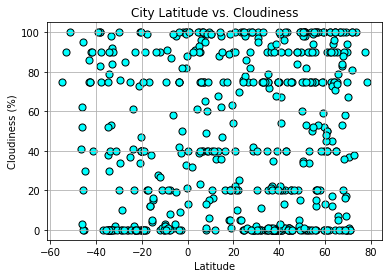

In [29]:
# build a scatter plot
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o", s=50, edgecolors="black", facecolors="aqua")

# create labels
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# save plot to folder
plt.savefig("WeatherPlots/CLOUDINESSvsLATITUDE.png")

# show plot
plt.show()

#### Latitude vs. Wind Speed Plot

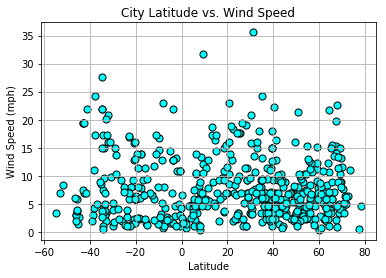

In [30]:
# build a scatter plot
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o", s=50, edgecolors="black", facecolors="aqua")

# create labels
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# save plot to folder
plt.savefig("WeatherPlots/WINDSPEEDvs_LATITUDE.png")

# show plot
plt.show()